# Projeto 1 - Ciência dos Dados

Nome: Luísa Manzig Kyrillos

Nome: Sarah Azevedo Pimenta da Costa

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import emoji

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Sarah Pimenta\Documents\Ciencia dos Dados\Projeto-1-Cdados-main\Projeto-1-Cdados-main


Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

In [3]:
filename = 'dorflex.xlsx'

In [4]:
train = pd.read_excel(filename)
train.head(5)

Treinamento  Classificação
0  nossa, o dorflex não me caiu muito bem não. tô...              1
1  @zezo_oriebir @flaviolordello @oiiuiz exato. o...              0
2          assisti matrix doidão de dorflex de novo.              0
3                             bom dia cade o dorflex              1
4  caí um tombo ontem tomando banho, que me esbor...              1

In [5]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test.head(5)

Teste  Classificação
0  @nathxnzika eu não consigo confiar que dorflex...              1
1                                poxa nenhum dorflex              0
2  o dorflex daqui de casa acabou e eu não aguent...              1
3  mlk no dia do meu aniversário eu vô ter que to...              1
4  gente tomar dois buscopan e um dorflex de uma ...              0

In [6]:
#Porcentagem de tweets relevantes e irelevantes no dorxel.xlsx
train['Classificação'].value_counts(normalize = True).round(4)*100

0    54.0
1    46.0
Name: Classificação, dtype: float64

### Juntando os tweets da planilha teste em um uníco texto:

In [7]:
#Tweets classificados como irrelevantes 
tudo_irrelevante = ' '.join(train.loc[(train['Classificação']==0),'Treinamento'])

In [8]:
#Tweets classificados como relevantes 
tudo_relevante = ' '.join(train.loc[(train['Classificação']==1),'Treinamento'])

### Função de limpeza dos tweets

In [9]:
import re 


def cleanup(text):

    #import string
    punctuation = '[/!-.,:?;''""]' 
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    texto = emoji.get_emoji_regexp().split(text_subbed)
    return ' '.join(texto)

In [10]:
#Limpa texto com tweets relevantes
relevante_limpo = cleanup(tudo_relevante.lower())

#Quebra texto relevante em palavras
todas_palavras_relevante = relevante_limpo.split()

In [11]:
#Limpa texto com tweets irrelevantes
irrelevante_limpo = cleanup(tudo_irrelevante.lower())

#Quebra texto irrelevante em palavras
todas_palavras_irrelevante = irrelevante_limpo.split()

### Montando tabelas de frequências:

In [12]:
# Guardando as palavras relevantes como um pd.Series
serie_relevante = pd.Series(todas_palavras_relevante)

# Guardando as palavras irrelevantes como um pd.Series
serie_irrelevante = pd.Series(todas_palavras_irrelevante)

___
## Classificador automático de sentimento


Faça aqui uma descrição do seu produto e o que considerou como relevante ou não relevante na classificação dos tweets.

**Classificação:**
* Relevante - boa ou má avaliação do produto 
* Irrelevante - não afeta diretamente a imagem do produto 

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [13]:
#Tabelas da frequencia relativa para tweets relevantes
tabela_relevante_relativa = serie_relevante.value_counts(True)

#Tabelas da frequencia absoluta para tweets relevantes
tabela_relevante_absoluta = serie_relevante.value_counts()
soma_relevante = tabela_relevante_absoluta.sum()               #somando a quantidade de palavras nos tweets relevantes



#Tabelas da frequencia relativa para tweets irrelevantes
tabela_irrelevante_relativa = serie_irrelevante.value_counts(True)

#Tabelas da frequencia absoluta para tweets irrelevantes
tabela_irrelevante_absoluta = serie_irrelevante.value_counts()
soma_irrelevante = tabela_irrelevante_absoluta.sum()            #somando a quantidade de palavras nos tweets irrelevantes

##### Palavra Total

In [14]:
palavra_total = relevante_limpo + irrelevante_limpo

In [15]:
#Montando PD.Series das palavras totais
todas_palavras_total = palavra_total.split()
serie_palavras_total = pd.Series(todas_palavras_total)

In [16]:
#Montando uma tabela de frequencia relativa para todas as palavras
tabela_palavra_total_relativa = serie_palavras_total.value_counts(True)

#Montando uma tabela de frequencia absoluta para todas as palavras
tabela_palavra_total_absoluta = serie_palavras_total.value_counts()
total_possivel = len(tabela_palavra_total_absoluta)     #total da contagem das palavras

##### Funções para encontar a probabilidade

In [17]:
#RELEVANTE - FUNÇÃO
def prob_Rev(tweet):
    
    probTweetDadoR = 1
    for palavra in cleanup(tweet.lower()).split():
        if palavra in tabela_relevante_absoluta:
            a = (tabela_relevante_absoluta[palavra] + 1)/(soma_relevante + total_possivel)
            probTweetDadoR *= a
        else:
            b =  (0 + 1)/(soma_relevante + total_possivel)
            probTweetDadoR *= b
    return probTweetDadoR

In [18]:
#IRRELEVANTE - FUNÇÃO
def prob_Irrev(tweet):
    
    probTweetDadoI = 1
    for palavra in cleanup(tweet.lower()).split():
        if palavra in tabela_irrelevante_absoluta:
            c = (tabela_irrelevante_absoluta[palavra] + 1)/(soma_irrelevante + total_possivel)
            probTweetDadoI *= c
        else:
            d = (0 + 1)/(soma_irrelevante + total_possivel)
            probTweetDadoI *= d
            
    return probTweetDadoI

In [19]:
#Probablidade de ser relevante e irrelevante
probR = len(todas_palavras_relevante)/len(todas_palavras_total)

probI = len(todas_palavras_irrelevante)/len(todas_palavras_total)

In [20]:
#Qual categoria o tweet se encaixa 
def classificadora(tweet):
    
    probRdadoTweet = prob_Rev(tweet) * probR
    probIdadoTweet = prob_Irrev(tweet) * probI
    if probRdadoTweet > probIdadoTweet:
        return 1
    else: 
        return 0


___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

In [21]:
#Pegando os tweets e classificando 
test['Clas NB']= test.Teste.apply(classificadora)

In [22]:
test.head(10)

Teste  Classificação  Clas NB
0  @nathxnzika eu não consigo confiar que dorflex...              1        1
1                                poxa nenhum dorflex              0        1
2  o dorflex daqui de casa acabou e eu não aguent...              1        1
3  mlk no dia do meu aniversário eu vô ter que to...              1        1
4  gente tomar dois buscopan e um dorflex de uma ...              0        1
5  @masaglu @flvioaugustosb1 nossa migles, quer u...              1        0
6  meu deus, to vivendo a base de dorflex mais do...              1        1
7  vo faze um estoque de dorflex no meu quarto  f...              1        0
8  essa semana tô na segunda cartela de dorflex 🤦...              1        0
9  @azullceleste @gasparimivanise @sesanbelempa a...              0        1

In [23]:
pd.crosstab(test['Classificação'], test['Clas NB'],normalize='index', margins=True)*100   

Clas NB                0          1
Classificação                      
0              39.285714  60.714286
1              46.788991  53.211009
All            43.523316  56.476684

* Porcentagem de verdadeiros positivos (relevante): 53.21%

* Porcentagem de verdadeiro negativo (irrelevante): 39,28% 

* Falso Positivo (mensagem irrelevante, classificada como relevante): 60.71%

* Falso Negatico (mensagem relevante, classificada como irrelevante): 46.78%

### ___
### Concluindo

**Comparativo e Explicação**

Os nossos verdadeiros positivos tiveram uma melhor performance quando comparados com os verdadeiros negativos. Com o nosso classificador obtivemos um número maior de tweets classificador como relevantes, quando deveriam ser irrelevantes, isso se deve a mensagens de dupla negação, ou seja, mensagens podem ter seu sentido alterado quando palavras são combinadas e ainda terem um peso maior na probabilidade de classificação; ou ainda sarcasmo, que não é identificado pelo computador, uma vez que é uma figura de linguagem e podendo ser contabilizado para a classificação oposta.

**Plano de Expansão**

Como o projeto foi desenvolvido em um curto espaço de tempo, não foi possivel recolher mais tweets para análise, e assim palavras que apresentam maior influência são suavizadas pelo Método Laplace. Desse modo, a continuidade do nosso projeto dentro da empresa seria de extremo benefício para ambos os lados, pois com o tempo maior a nossa base de dados aumentaria acarretando na entrega de melhores resultados. 

**Motivo para não alimentar a base de treinamento automaticamente**

Como a primira base de dados foi classificada a mão, existe uma interpretação por trás baseada no julgamento de uma pessoa, sendo asssim existe uma padronização que se restringe a exatemente aquela base de dados, diminuindo a flexibilidade do classificador à medida em que ele é esecutado. Além disso como a precisão do nosso classificador ainda é baixa, não seria ideial alimentar a planila de treinamento com o próprio classificador, pois poderia acaretar em uma classificação equivocada, trazendo resultados prejudicados para a empresa. 

**Proposta de novos cenários**
* Probabilidade de organizar manifestações via redes sociais; 
* Probabilidade de uma aluno acertar uma questão discursiva em prova, pautado nas palavras da resposta esperada;
* Chance de uma pessoa cometer atos suicidas, a partir de posts e teweets em suas redes sociais. 

**Futuras Iterações para o Classificador Naive-Bayes:**
* Retirada de usuários nos tweets (todas as letras seguidas de @), diminuindo a memória e o processamento do computador - adicionar novo comando na função cleanup;
* Aumentar a base de treinamento do classificador - pegar novos tweets e classificar a mão;
* Criar categorias intermediárias de relevância, baseado nas procentagens - https://www.maxwell.vrac.puc-rio.br/14382/14382_4.PDF.


___
### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste

Caso for fazer esse item do Projeto

In [24]:
tre = pd.read_excel(filename)
te = pd.read_excel(filename, sheet_name = 'Teste')

tre = tre.rename(columns={'Treinamento': 'tweet'})
te = te.rename(columns={'Teste': 'tweet'})

lista_tweet = [tre, te]

tre_te = pd.concat(lista_tweet)


In [28]:
from sklearn.model_selection import train_test_split
lista_acertos = []

for i in range(100):
    train, test =  train_test_split(tre_te, test_size=0.4)
    
    tre_irrelevante = train.loc[(train['Classificação'] == 0),:]
    tre_relevante = train.loc[(train['Classificação'] == 1),:]
    
    
    tudo_irrelevante = ' '.join(train.loc[(train['Classificação']==0),'tweet'])
    tudo_relevante = ' '.join(train.loc[(train['Classificação']==1),'tweet'])
    
    
    relevante_limpo = cleanup(tudo_irrelevante.lower())
    todas_palavras_relevante = irrelevante_limpo.split()        #Quebra texto relevante em palavras
    
    relevante_limpo = cleanup(tudo_relevante.lower())           #Limpa texto com tweets relevantes
    todas_palavras_relevante = relevante_limpo.split()          #Quebra texto relevante em palavras
    

    serie_relevante = pd.Series(todas_palavras_relevante)       # Guardando as palavras relevantes como um pd.Series
    serie_irrelevante = pd.Series(todas_palavras_irrelevante)   # Guardando as palavras irrelevantes como um pd.Series



    tabela_relevante_relativa = serie_relevante.value_counts(True) #Tabelas da frequencia relativa para tweets relevantes
    tabela_relevante_absoluta = serie_relevante.value_counts()     #Tabelas da frequencia absoluta para tweets relevantes
    soma_relevante = tabela_relevante_absoluta.sum()               #somando a quantidade de palavras nos tweets relevantes


    tabela_irrelevante_relativa = serie_irrelevante.value_counts(True) 
    tabela_irrelevante_absoluta = serie_irrelevante.value_counts()  
    soma_irrelevante = tabela_irrelevante_absoluta.sum() 
    
    #PALAVRA TOTAL
    palavra_total = relevante_limpo + irrelevante_limpo
    todas_palavras_total = palavra_total.split()
    serie_palavras_total = pd.Series(todas_palavras_total)
    
    tabela_palavra_total_relativa = serie_palavras_total.value_counts(True) 
    tabela_palavra_total_absoluta = serie_palavras_total.value_counts() 
    total_possivel = len(tabela_palavra_total_absoluta) 
    
    
    test['Clas NB']= test.tweet.apply(classificadora)
    
    t = pd.crosstab(test['Classificação'], test['Clas NB'], normalize =True)
    porcentagem = t.iloc[0,0]+t.iloc[1,1]
    lista_acertos.append(porcentagem)

<ipython-input-28-8f4f1cf64713>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Clas NB']= test.tweet.apply(classificadora)


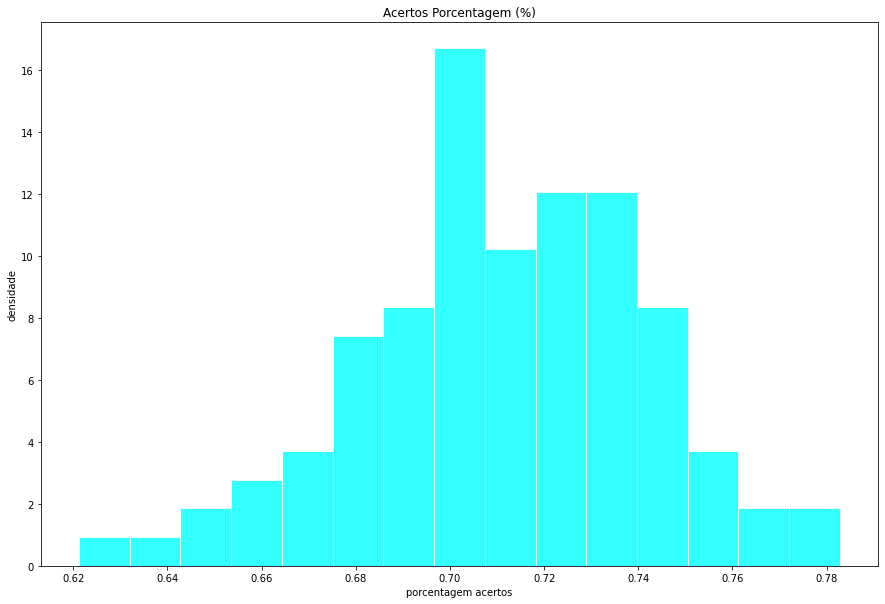

In [29]:
import matplotlib.pyplot as plt

f = plt.figure(figsize = (15,10))
plt.hist(lista_acertos, edgecolor = 'white', density = True, alpha = 0.8,bins = 15, color = 'cyan')
plt.title('Acertos Porcentagem (%)')
plt.xlabel('porcentagem acertos')
plt.ylabel('densidade')
plt.show()

In [33]:
#Média
m = sum(lista_acertos)/len(lista_acertos)
print(f'Média de acertos:{m}')

Média de acertos:0.7113131313131311


## Analisando o Histograma: ##

Após utilizar 100 difrentes combinações de tweets, foi possivel concluir que a performance varia entre 62% e 78%, apresentando acurácia média de 71,13%. Portando os resultados são satisfatórios tendo em vista o curto prazo e simplicidade do desenvolvimento.

___
## Aperfeiçoamento:

Os trabalhos vão evoluir em conceito dependendo da quantidade de itens avançados:

* Limpar: \n, :, ", ', (, ), etc SEM remover emojis
* Corrigir separação de espaços entre palavras e emojis ou entre emojis e emojis
* Propor outras limpezas e transformações que não afetem a qualidade da informação ou classificação
* Criar categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante (3 categorias: C, mais categorias conta para B)
* Explicar por que não posso usar o próprio classificador para gerar mais amostras de treinamento
* Propor diferentes cenários para Naïve Bayes fora do contexto do projeto
* Sugerir e explicar melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)


___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**